# **Project Name:**



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Pratik Choudhuri

# **Project Summary:**

This notebook analyzes the Netflix Movies and TV Shows dataset, which contains 8807 entries (movies and TV shows) with 13 columns of metadata
gigasheet.com
. We perform data cleaning, exploratory data analysis (EDA), country-wise content analysis, time-trend analysis, and content clustering to understand distribution and trends in Netflix’s content library. The goal is to reveal insights such as content type proportions, popular genres and creators, regional differences, and how Netflix’s focus on content types has changed over time.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Netflix and similar streaming platforms struggle with content personalization, acquisition, and retention. They need to understand:

- What kind of content performs well across regions.

- Whether users prefer movies or TV shows over time.

- How external popularity indicators (like IMDb and Rotten Tomatoes ratings) correlate with viewer satisfaction.

# **Business Objective**

To **optimize** content strategy by leveraging external ratings and internal metadata to:

1. **Improve recommendation algorithms** based on high-rated genres or directors.

2. **Inform content acquisition or production** by focusing on genres with consistently high external ratings.

3. **Boost viewer retention and satisfaction** through targeted, data-driven content offerings.

4. **Identify underperforming content** for removal or limited promotion.

## ***1. Know Your Data***

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

### Dataset Loading

In [2]:
# Load the Netflix dataset
df = pd.read_csv('netflix.csv') 

In [4]:
# Dataset First Look
print(df.head())
print(f'\n\nColumns: {len(df.columns)} \n{df.columns}\n\n')
df.info()
print(f'\n\nDuplicate rows:\n{df.duplicated().sum()}')
print(f'\n\nNull Rows:\n{df.isnull().sum()}')
print(f'\n\nEntries: {len(df)}')
print(f'\n\nContent Types:\n{df["type"].value_counts()}')
print(f'\n\nRating Categories:\n{df["rating"].value_counts().head(10)}')




  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4   

### What did you know about your dataset?

In our dataset, some entries have missing director, cast, or country values. Overall, the data has 7787 entries across 12 fields

**Variables Description**
Below is a brief description of the key columns:
- **show_id**: Unique ID for each title.
- **type**: Content type (Movie or TV Show).
- **title**: Title of the movie or show.
- **director**, **cast**: Name(s) of director(s) or cast (actors) separated by commas.
- **country**: Country or countries where the title was produced (comma-separated).
- **date_added**: Date the title was added to Netflix’s catalog.
- **release_year**: The year the content was originally released.
- **rating**: Rating classification (e.g., TV-MA, R, PG-13).
- **duration**: For movies, length in minutes (e.g., 90 min); for TV shows, number of seasons (e.g., 3 Seasons).
- **listed_in**: Comma-separated genre/categories.
- **description**: Short synopsis of the content.

## 3. ***Data Wrangling, Cleaning and Preprocessing***

We clean the data to prepare for analysis:
- **Remove duplicates** (if any).
- **Convert date fields:** Parse date_added as a datetime object.
- **Handle missing values:** Fill or flag missing entries, especially in text fields.
- **Clean text fields:** Remove extra whitespace if needed.

In [5]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors='coerce')
# print(f'No Dates: {df["date_added"].isnull().sum()}')

# Fill missing values in key text fields with 'Unknown'
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')
df['duration'] = df['duration'].fillna('Unknown')

# Trim whitespace in title/genre columns (optional)
df['title'] = df['title'].str.strip()
df['listed_in'] = df['listed_in'].str.strip()


In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [7]:
df=df.dropna()
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7689 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7689 non-null   object        
 1   type          7689 non-null   object        
 2   title         7689 non-null   object        
 3   director      7689 non-null   object        
 4   cast          7689 non-null   object        
 5   country       7689 non-null   object        
 6   date_added    7689 non-null   datetime64[ns]
 7   release_year  7689 non-null   int64         
 8   rating        7689 non-null   object        
 9   duration      7689 non-null   object        
 10  listed_in     7689 non-null   object        
 11  description   7689 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 780.9+ KB


**To make the analysis easier, lets encode the categorical data**

| Column      | Type             | Strategy                  |
| ----------- | ---------------- | ------------------------- |
| `type`      | Single Category  | Label or One-Hot Encoding |
| `director`  | High-cardinality | Frequency/Top-N encoding  |
| `cast`      | Multi-category   | Multi-hot / Top-N binary  |
| `country`   | Multi-category   | Multi-hot / Top-N binary  |
| `rating`    | Single category  | One-Hot or Label Encoding |
| `duration`  | Textual numeric  | Convert to int + encode   |
| `listed_in` | Multi-category   | Multi-hot / Top genres    |


In [8]:
df['type_encoded'] = df['type'].map({'Movie': 0, 'TV Show': 1})
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type_encoded
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,0


In [9]:
# Get top 10 frequent actors
top_directors = df['director'].value_counts().head(10).index
df['director_encoded'] = df['director'].apply(lambda x: x if x in top_directors and x != "Unknown" else 'Other')

# Create bin flags
df = pd.get_dummies(df, columns=['director_encoded'], prefix='dir')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,dir_Cathy Garcia-Molina,dir_David Dhawan,dir_Jay Chapman,dir_Jay Karas,dir_Marcus Raboy,dir_Martin Scorsese,dir_Other,"dir_Raúl Campos, Jan Suter",dir_Steven Spielberg,dir_Youssef Chahine
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,...,False,False,False,False,False,False,True,False,False,False
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,...,False,False,False,False,False,False,True,False,False,False
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,...,False,False,False,False,False,False,True,False,False,False
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,...,False,False,False,False,False,False,True,False,False,False
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,...,False,False,False,False,False,False,True,False,False,False


In [10]:
from collections import Counter

# Get top 10 frequent actors
cast_split = df['cast'].dropna().str.split(', ')
flat_cast = [actor for sublist in cast_split for actor in sublist]
top_actors = [actor for actor, _ in Counter(flat_cast).most_common(10)]

# Create bin flags
for actor in top_actors:
    df[f'cast_{actor}'] = df['cast'].apply(lambda x: 1 if pd.notna(x) and actor in x and actor != "Unknown" else 0)


In [11]:
top_actors

['Unknown',
 'Anupam Kher',
 'Shah Rukh Khan',
 'Naseeruddin Shah',
 'Om Puri',
 'Akshay Kumar',
 'Takahiro Sakurai',
 'Boman Irani',
 'Amitabh Bachchan',
 'Paresh Rawal']

In [12]:
# For movies, extract minutes and seasons for shows
df['length'] = df['duration'].str.extract(r'(\d+)').astype(float)

# Optional: create "is_tv_show" flag
df['is_tv_show'] = df['duration'].str.contains('Season').astype(int)


In [13]:
#Define a rating hierarchy (based on audience age), which helps models understand progression from kids to mature content.

rating_order = {
    'TV-Y': 1, 'TV-G': 2, 'G': 3, 'TV-Y7': 4, 'PG': 5,
    'TV-PG': 6, 'PG-13': 7, 'TV-14': 8, 'R': 9, 'TV-MA': 10, 'NC-17': 11,
    'NR': 12, 'UR': 13, 'Unknown': 0
}

df['rating'] = df['rating'].fillna('Unknown')
df['rating_encoded'] = df['rating'].map(rating_order)

In [14]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,cast_Naseeruddin Shah,cast_Om Puri,cast_Akshay Kumar,cast_Takahiro Sakurai,cast_Boman Irani,cast_Amitabh Bachchan,cast_Paresh Rawal,length,is_tv_show,rating_encoded
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,...,0,0,0,0,0,0,0,4.0,1,10.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,...,0,0,0,0,0,0,0,93.0,0,10.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,...,0,0,0,0,0,0,0,78.0,0,9.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,...,0,0,0,0,0,0,0,80.0,0,7.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,...,0,0,0,0,0,0,0,123.0,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,...,0,0,0,0,0,0,0,99.0,0,10.0
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,...,0,0,0,0,0,0,0,111.0,0,8.0
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,Unknown,2020-09-25,2019,TV-MA,44 min,...,0,0,0,0,0,0,0,44.0,0,10.0
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,...,0,0,0,0,0,0,0,1.0,1,6.0


In [15]:
from collections import Counter

# Step 1: Split genres
genre_split = df['listed_in'].str.split(', ')
all_genres = [genre for sublist in genre_split for genre in sublist]
all_genres = list(set(all_genres))

# Step 2: Get top 10 genres
top_genres = [g for g, _ in Counter(all_genres).most_common(10)]

# Step 3: Multi-hot encode
for genre in all_genres:
    col_name = f'genre_{genre.strip().replace(" ", "_")}'
    df[col_name] = df['listed_in'].apply(lambda x: int(genre in x.split(', ')))

print(len(all_genres))

df['genre_count'] = df['listed_in'].apply(lambda x: len(x.split(', ')))


42


In [33]:
df_encoded = df.drop(['type', 'director', 'cast', 'country', 'rating', 'duration', 'listed_in'], axis=1)

In [34]:
df_encoded.columns

Index(['show_id', 'title', 'date_added', 'release_year', 'description',
       'type_encoded', 'dir_Cathy Garcia-Molina', 'dir_David Dhawan',
       'dir_Jay Chapman', 'dir_Jay Karas', 'dir_Marcus Raboy',
       'dir_Martin Scorsese', 'dir_Other', 'dir_Raúl Campos, Jan Suter',
       'dir_Steven Spielberg', 'dir_Youssef Chahine', 'cast_Unknown',
       'cast_Anupam Kher', 'cast_Shah Rukh Khan', 'cast_Naseeruddin Shah',
       'cast_Om Puri', 'cast_Akshay Kumar', 'cast_Takahiro Sakurai',
       'cast_Boman Irani', 'cast_Amitabh Bachchan', 'cast_Paresh Rawal',
       'length', 'is_tv_show', 'rating_encoded', 'genre_Dramas',
       'genre_TV_Horror', 'genre_Science_&_Nature_TV', 'genre_Thrillers',
       'genre_Horror_Movies', 'genre_Stand-Up_Comedy_&_Talk_Shows',
       'genre_Docuseries', 'genre_Sports_Movies', 'genre_Movies',
       'genre_LGBTQ_Movies', 'genre_Romantic_TV_Shows', 'genre_TV_Shows',
       'genre_TV_Dramas', 'genre_Comedies', 'genre_Children_&_Family_Movies',
       'ge

#### Chart - 1: Director vs Content Type Distribution

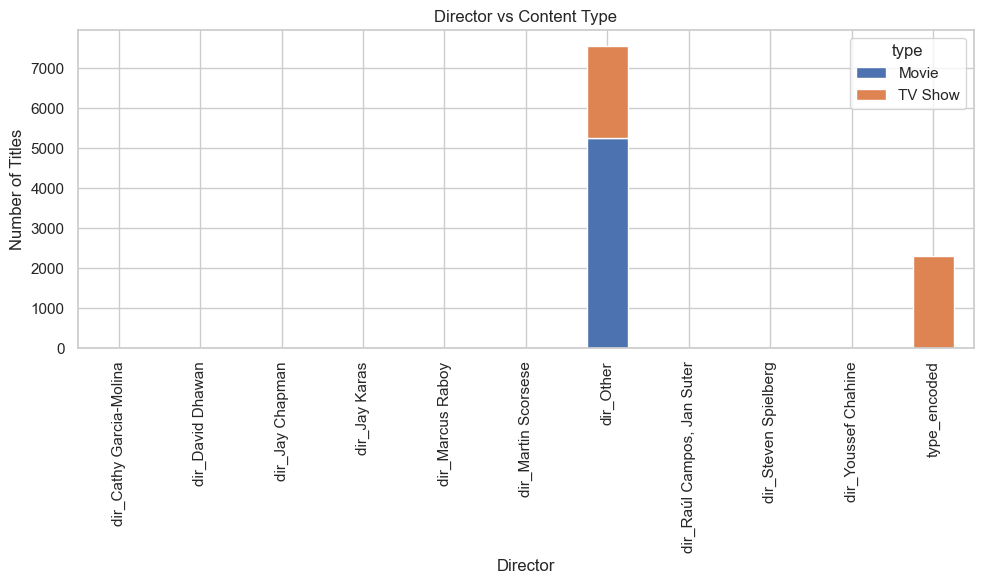

TypeError: Image data of dtype object cannot be converted to float

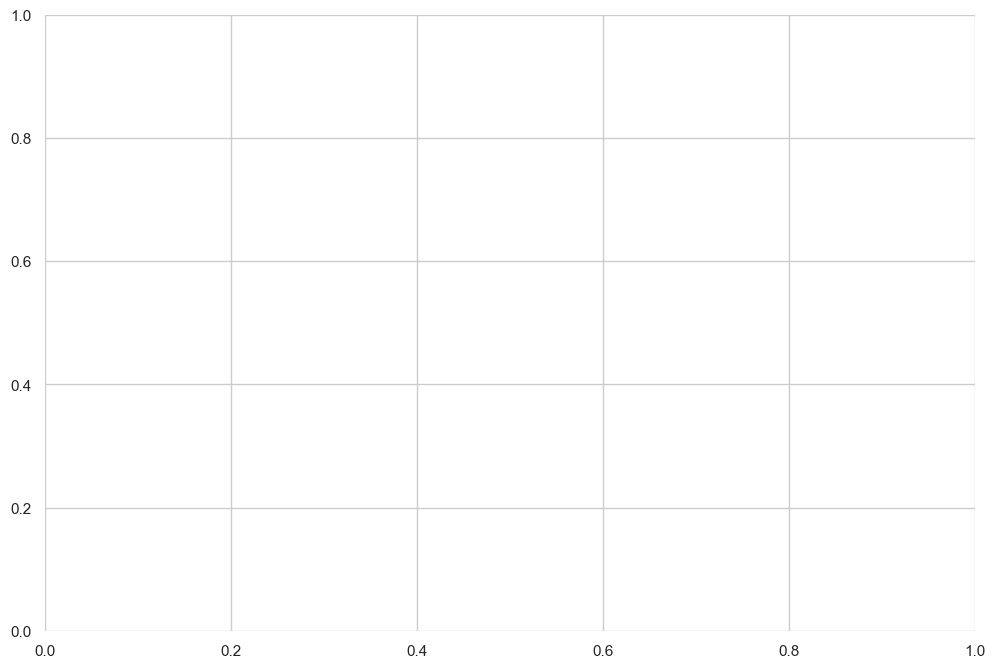

In [35]:
# Stacked Bar Chart: Director vs Movie/TV Count
director_cols = [col for col in df_encoded.columns if col.startswith('dir_')]
df_director_type = df_encoded[director_cols + ['type_encoded']].copy()
df_director_type['type'] = df_director_type['type_encoded'].map({0: 'Movie', 1: 'TV Show'})
df_melted = df_director_type.melt(id_vars='type', var_name='Director', value_name='HasDirected')
df_melted = df_melted[df_melted['HasDirected'] == 1]

pivot = df_melted.groupby(['Director', 'type']).size().unstack(fill_value=0)

pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Director vs Content Type')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()

# Heatmap: Director vs Genre
genre_cols = [col for col in df_encoded.columns if col.startswith('genre_')]
dir_genre = df_encoded[director_cols + genre_cols]
dir_genre_corr = dir_genre.T.dot(dir_genre)  # Co-occurrence matrix

plt.figure(figsize=(12, 8))
sns.heatmap(dir_genre_corr.loc[director_cols, genre_cols], cmap='viridis')
plt.title('Director vs Genre Presence')
plt.tight_layout()
plt.show()


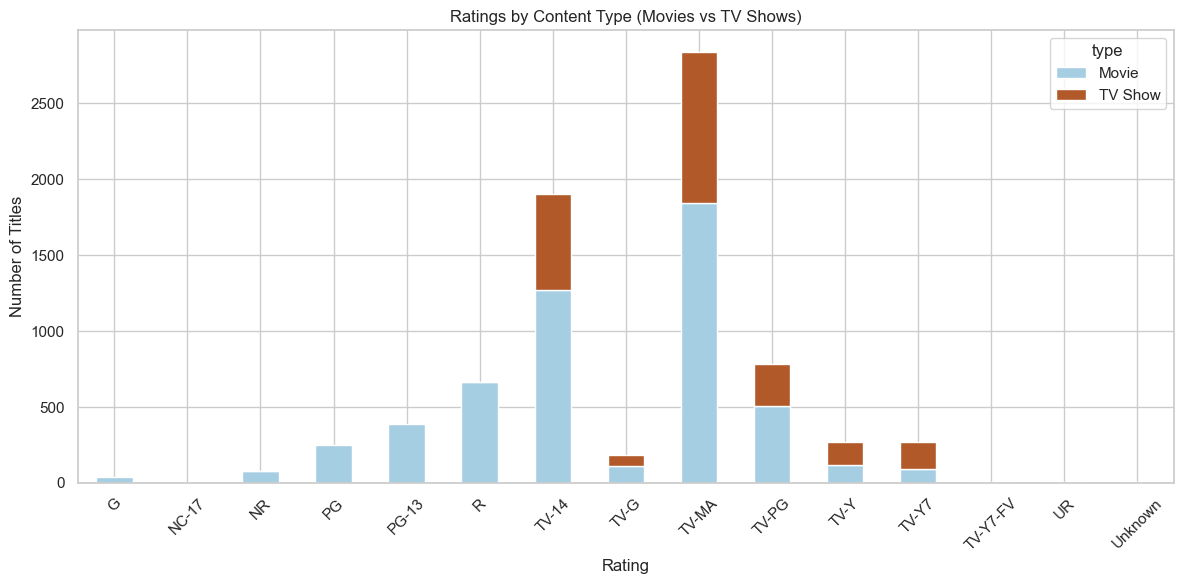

In [18]:
rating_by_type = df.groupby(['type', 'rating']).size().unstack().fillna(0)

rating_by_type.T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Paired')
plt.title("Ratings by Content Type (Movies vs TV Shows)")
plt.ylabel("Number of Titles")
plt.xlabel("Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2: Actor vs Length & Genre Spread

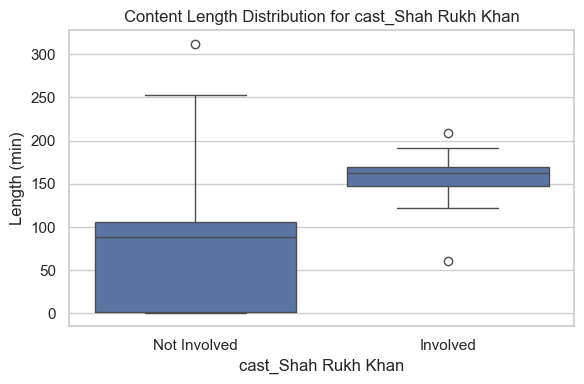

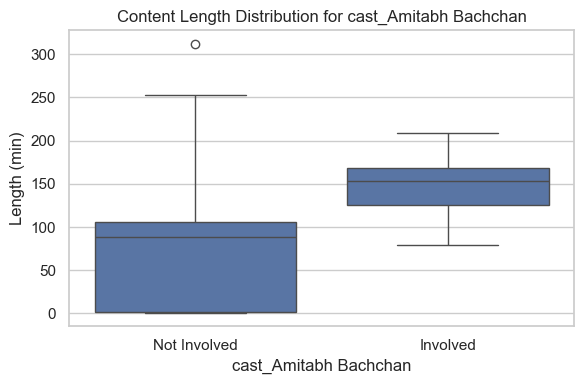

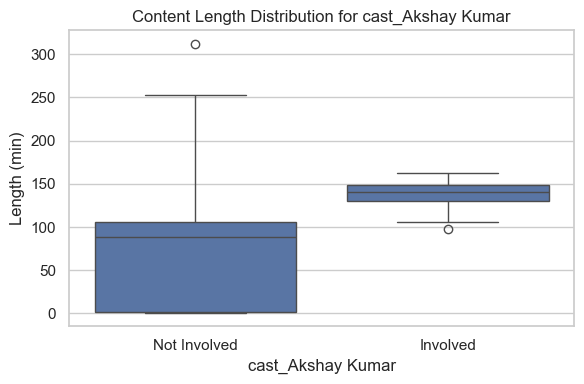

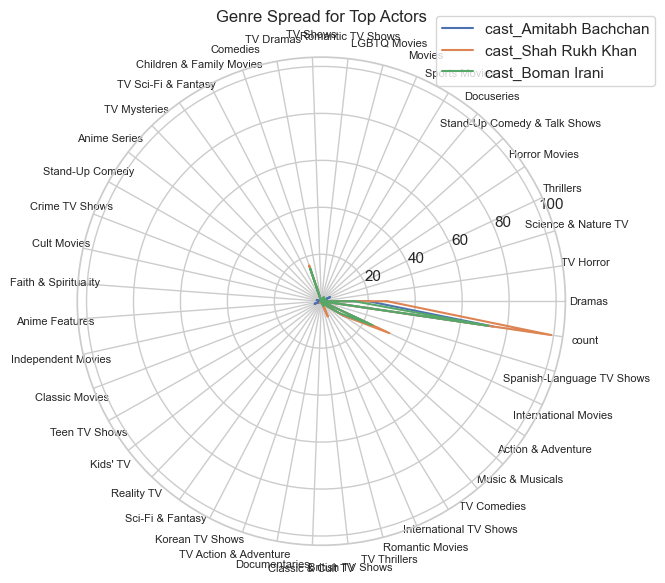

In [36]:
# Box Plot: Length by Actor
actor_cols = [col for col in df_encoded.columns if col.startswith('cast_')]

for actor in ['cast_Shah Rukh Khan', 'cast_Amitabh Bachchan', 'cast_Akshay Kumar']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_encoded[actor], y=df_encoded['length'])
    plt.title(f'Content Length Distribution for {actor}')
    plt.xlabel(actor)
    plt.ylabel('Length (min)')
    plt.xticks([0, 1], ['Not Involved', 'Involved'])
    plt.tight_layout()
    plt.show()

# Radar Chart: Genre Diversity for Top 3 Actors
import numpy as np

top_actors = ['cast_Amitabh Bachchan', 'cast_Shah Rukh Khan', 'cast_Boman Irani']
genre_cols = [col for col in df_encoded.columns if col.startswith('genre_')]
angles = np.linspace(0, 2 * np.pi, len(genre_cols), endpoint=False).tolist()
angles += angles[:1]

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111, polar=True)

for actor in top_actors:
    values = df_encoded[df_encoded[actor] == 1][genre_cols].sum().tolist()
    values += values[:1]
    ax.plot(angles, values, label=actor)

ax.set_xticks(angles[:-1])
ax.set_xticklabels([g.replace("genre_", "").replace("_", " ") for g in genre_cols], fontsize=8)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.title('Genre Spread for Top Actors')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3: Genre Popularity Over Time

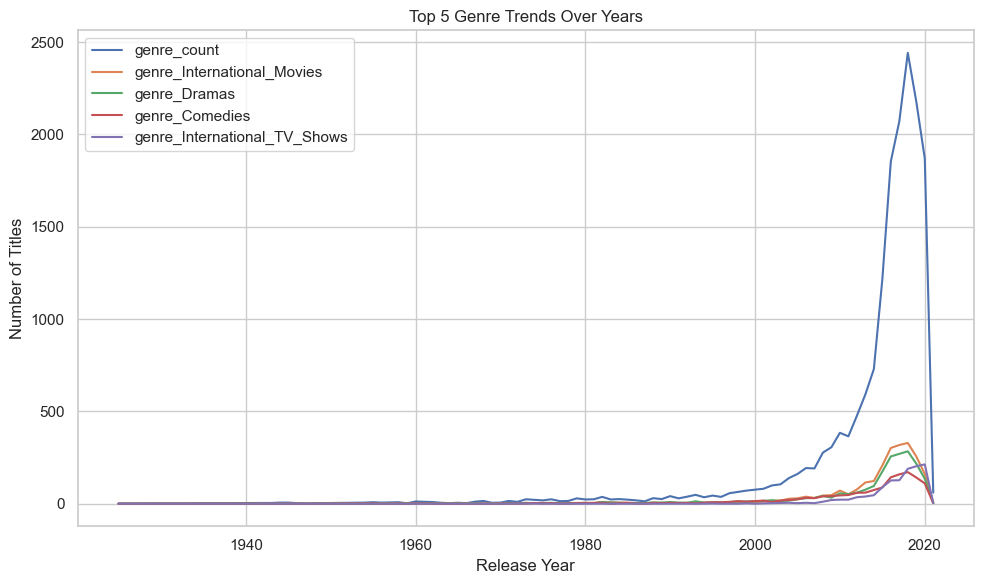

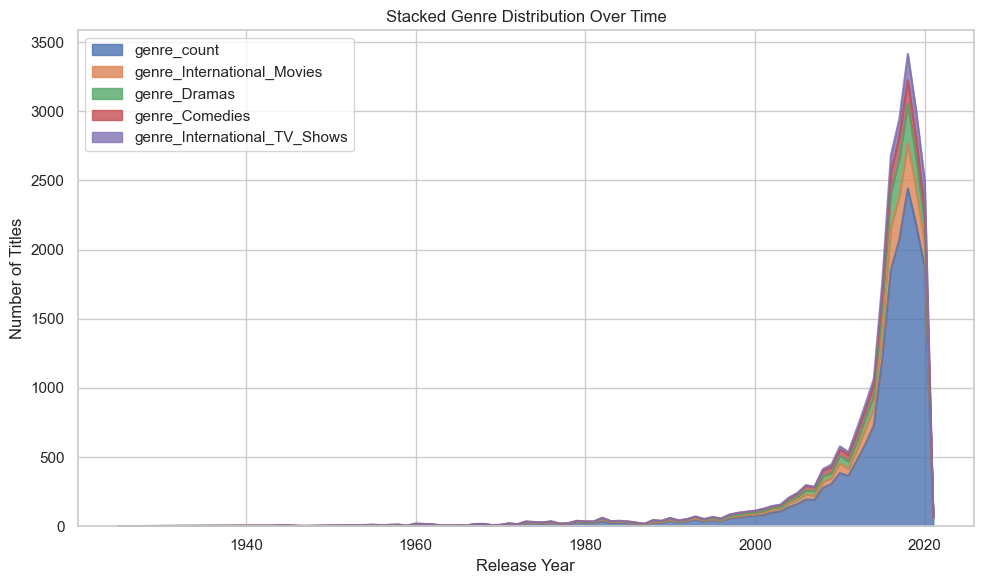

In [37]:
# Line Chart: Top 5 Genres over Time
genre_sums = df_encoded[genre_cols].sum().sort_values(ascending=False).head(5).index.tolist()
df_year_genre = df_encoded.groupby('release_year')[genre_sums].sum()

df_year_genre.plot(figsize=(10, 6))
plt.title('Top 5 Genre Trends Over Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Stacked Area Chart
df_year_genre.plot.area(figsize=(10, 6), alpha=0.8)
plt.title('Stacked Genre Distribution Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4: Rating vs Genre Count vs Content Type

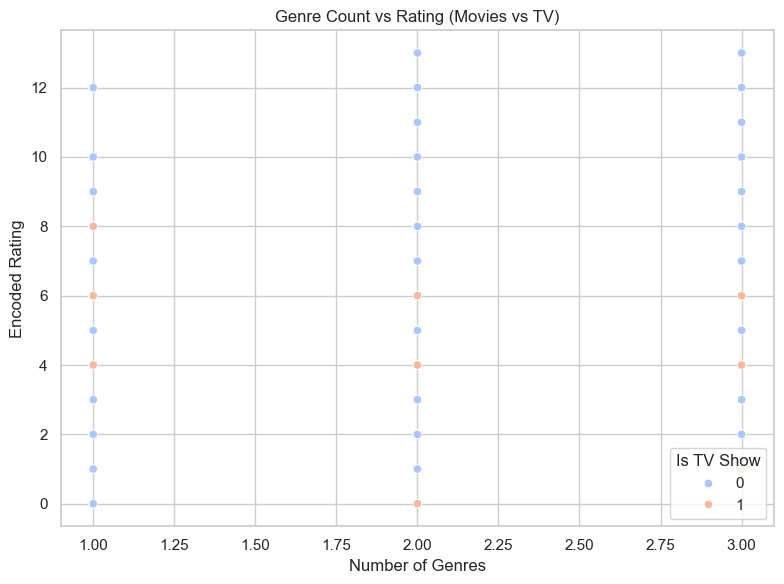

In [38]:
# Scatter Plot: Genre Count vs Rating (Color by is_tv_show)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_encoded, x='genre_count', y='rating_encoded', hue='is_tv_show', palette='coolwarm')
plt.title('Genre Count vs Rating (Movies vs TV)')
plt.xlabel('Number of Genres')
plt.ylabel('Encoded Rating')
plt.legend(title='Is TV Show')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5 Niche Market: International Content and Creators

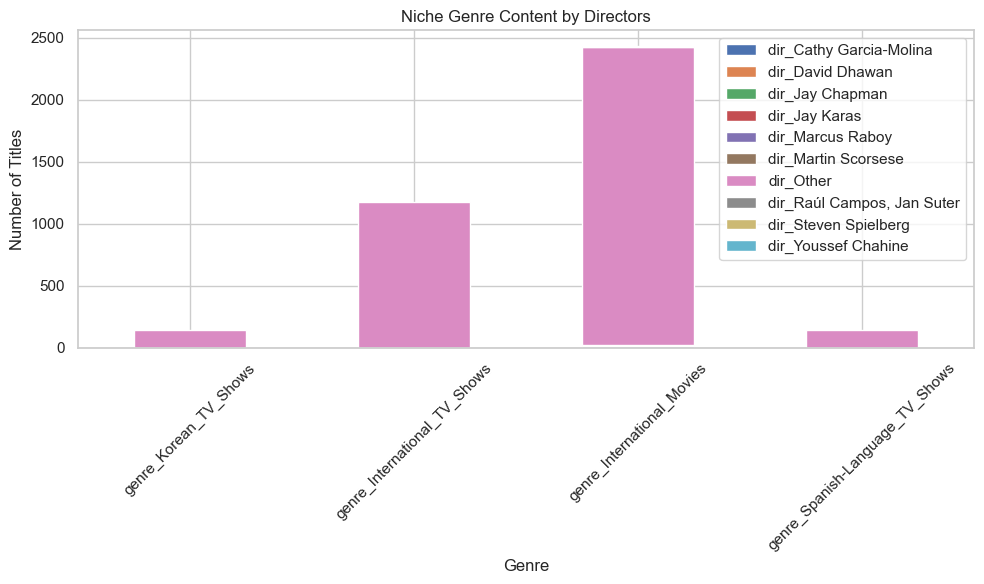

In [39]:
niche_cols = [col for col in genre_cols if "International" in col or "Korean" in col or "Spanish" in col]

# Sankey or TreeMap not supported by matplotlib; so use stacked bar
df_niche = df_encoded[niche_cols + director_cols]
df_niche_sum = df_niche[niche_cols].sum().sort_values(ascending=False)
df_niche_dir = df_niche[director_cols + niche_cols].groupby(df_encoded[director_cols].idxmax(axis=1)).sum()

df_niche_dir[niche_cols].T.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Niche Genre Content by Directors')
plt.ylabel('Number of Titles')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6: Density Heatmap

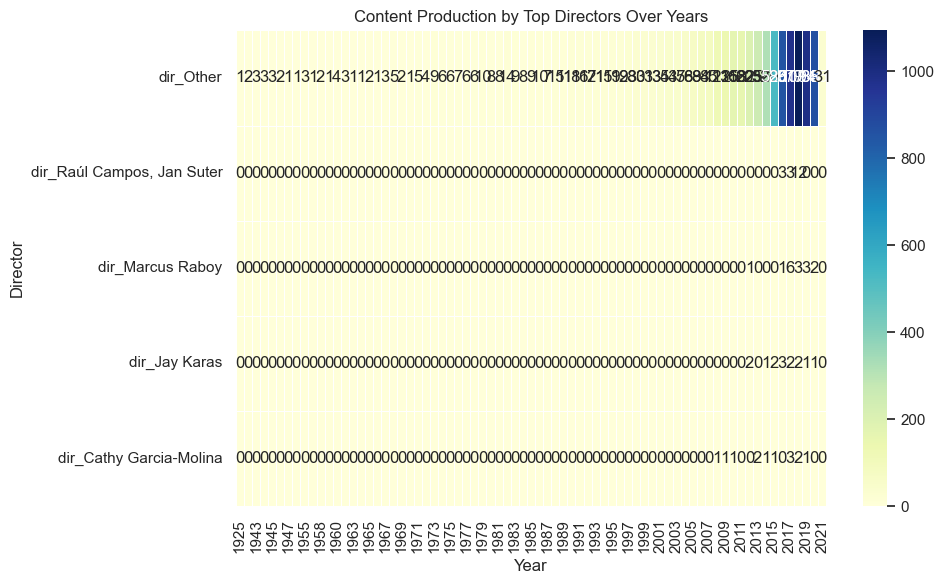

In [40]:
# Heatmap of content density: Director vs Year
top_directors = df_encoded[director_cols].sum().sort_values(ascending=False).head(5).index
df_dir_year = pd.DataFrame(index=df_encoded['release_year'].unique().tolist())

for d in top_directors:
    df_dir_year[d] = df_encoded[df_encoded[d] == 1].groupby('release_year').size()

df_dir_year.fillna(0, inplace=True)
df_dir_year = df_dir_year.sort_index()

plt.figure(figsize=(10, 6))
sns.heatmap(df_dir_year.T, cmap="YlGnBu", linewidths=0.5, annot=True, fmt='g')
plt.title("Content Production by Top Directors Over Years")
plt.xlabel("Year")
plt.ylabel("Director")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [24]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [25]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [26]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [27]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [1]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [29]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [30]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [31]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [32]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***